In [1]:
import os
import pandas as pd
df = pd.read_csv(os.path.join('data','commit.csv'))
pr_df = pd.read_csv(os.path.join('pr_raw_data.csv'))
issue_df = pd.read_csv(os.path.join('data','issue.csv'))
files_df = pd.read_csv(os.path.join('data', 'files.csv'))
language_df = pd.read_csv(os.path.join('data', 'languages.csv'))

In [2]:
pr_df

Author                                           Reviewer  \
0     richard-salam                                                 []   
1          waclaw66               [NamedUser(login="michelheusschen")]   
2       zackpollard                       [NamedUser(login="jrasm91")]   
3      alextran1502                       [NamedUser(login="jrasm91")]   
4       zackpollard  [NamedUser(login="bo0tzz"), NamedUser(login="m...   
...             ...                                                ...   
4413   alextran1502                                                 []   
4414   alextran1502                                                 []   
4415   alextran1502                                                 []   
4416        schklom                                                 []   
4417   alextran1502                                                 []   

     Pr_state                 Created_at                 Updated_at  \
0        open  2024-06-13 13:31:14+00:00  2024-06-13 13:31:29+00:00   
1        open  2024-06-13 12:48:13+00:00  2024-06-13 13:41:07+00:00   
2      closed  2024-06-13 12:38:18+00:00  2024-06-13 12:44:07+00:00   
3        open  2024-06-13 12:33:47+00:00  2024-06-13 13:18:29+00:00   
4      closed  2024-06-13 11:13:55+00:00  2024-06-13 11:37:43+00:00   
...       ...                        ...                        ...   
4413   closed  2022-02-08 17:24:07+00:00  2024-03-12 15:28:50+00:00   
4414   closed  2022-02-08 05:42:11+00:00  2024-02-13 22:15:20+00:00   
4415   closed  2022-02-07 02:28:28+00:00  2024-03-09 23:22:33+00:00   
4416   closed  2022-02-06 18:08:06+00:00  2024-03-09 04:16:39+00:00   
4417   closed  2022-02-06 06:07:43+00:00  2024-05-29 17:11:53+00:00   

      Additions  Commits                  Merged_at  
0             8        1                        NaN  
1           102        1                        NaN  
2             0        1  2024-06-13 12:44:06+00:00  
3            36        4                        NaN  
4             7        2  2024-06-13 11:37:15+00:00  
...         ...      ...                        ...  
4413        343        2  2022-02-08 17:24:49+00:00  
4414      10715        2  2022-02-08 05:42:35+00:00  
4415        133        3  2022-02-07 02:31:32+00:00  
4416         53        2  2022-02-06 19:06:01+00:00  
4417        581       14  2022-02-06 06:07:56+00:00  

[4418 rows x 8 columns]

In [3]:
pr_df.dtypes

Author        object
Reviewer      object
Pr_state      object
Created_at    object
Updated_at    object
Additions      int64
Commits        int64
Merged_at     object
dtype: object

In [4]:
import re
pr_fix = []
i = 0
for reviewers in pr_df['Reviewer']:
    if reviewers == '[]':
        reviewers =''
    else:
        reviewers =re.search(r'login="([^"]+)"', reviewers).group(1)
    pr_df['Reviewer'].loc[i]=reviewers
    i+=1
pr_df

/tmp/ipykernel_127279/2620306063.py:9: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  pr_df['Reviewer'].loc[i]=reviewers
/tmp/ipykernel_127279/2620306063.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a D

Author         Reviewer Pr_state                 Created_at  \
0     richard-salam                      open  2024-06-13 13:31:14+00:00   
1          waclaw66  michelheusschen     open  2024-06-13 12:48:13+00:00   
2       zackpollard          jrasm91   closed  2024-06-13 12:38:18+00:00   
3      alextran1502          jrasm91     open  2024-06-13 12:33:47+00:00   
4       zackpollard           bo0tzz   closed  2024-06-13 11:13:55+00:00   
...             ...              ...      ...                        ...   
4413   alextran1502                    closed  2022-02-08 17:24:07+00:00   
4414   alextran1502                    closed  2022-02-08 05:42:11+00:00   
4415   alextran1502                    closed  2022-02-07 02:28:28+00:00   
4416        schklom                    closed  2022-02-06 18:08:06+00:00   
4417   alextran1502                    closed  2022-02-06 06:07:43+00:00   

                     Updated_at  Additions  Commits                  Merged_at  
0     2024-06-13 13:31:29+00:00          8        1                        NaN  
1     2024-06-13 13:41:07+00:00        102        1                        NaN  
2     2024-06-13 12:44:07+00:00          0        1  2024-06-13 12:44:06+00:00  
3     2024-06-13 13:18:29+00:00         36        4                        NaN  
4     2024-06-13 11:37:43+00:00          7        2  2024-06-13 11:37:15+00:00  
...                         ...        ...      ...                        ...  
4413  2024-03-12 15:28:50+00:00        343        2  2022-02-08 17:24:49+00:00  
4414  2024-02-13 22:15:20+00:00      10715        2  2022-02-08 05:42:35+00:00  
4415  2024-03-09 23:22:33+00:00        133        3  2022-02-07 02:31:32+00:00  
4416  2024-03-09 04:16:39+00:00         53        2  2022-02-06 19:06:01+00:00  
4417  2024-05-29 17:11:53+00:00        581       14  2022-02-06 06:07:56+00:00  

[4418 rows x 8 columns]

In [8]:
import networkx as nx

In [16]:

G = nx.Graph()
df_temp = pd.DataFrame()
df_temp['Author'] = pr_df['Author'].copy()
df_temp['Reviewer'] = pr_df['Reviewer'].copy()

In [17]:
for i in range(df_temp.shape[0]-1):
    if df_temp['Reviewer'].loc[i] !='':
        G.add_edge(df_temp['Author'].loc[i],df_temp['Reviewer'].loc[i])

In [19]:
import datetime 
import matplotlib.pyplot as plt
import seaborn as sns
import seaborn.objects as so
start = datetime.datetime(2022,2,3)
end = datetime.datetime(2024, 6, 10)

In [21]:
print(G)

Graph with 358 nodes and 625 edges


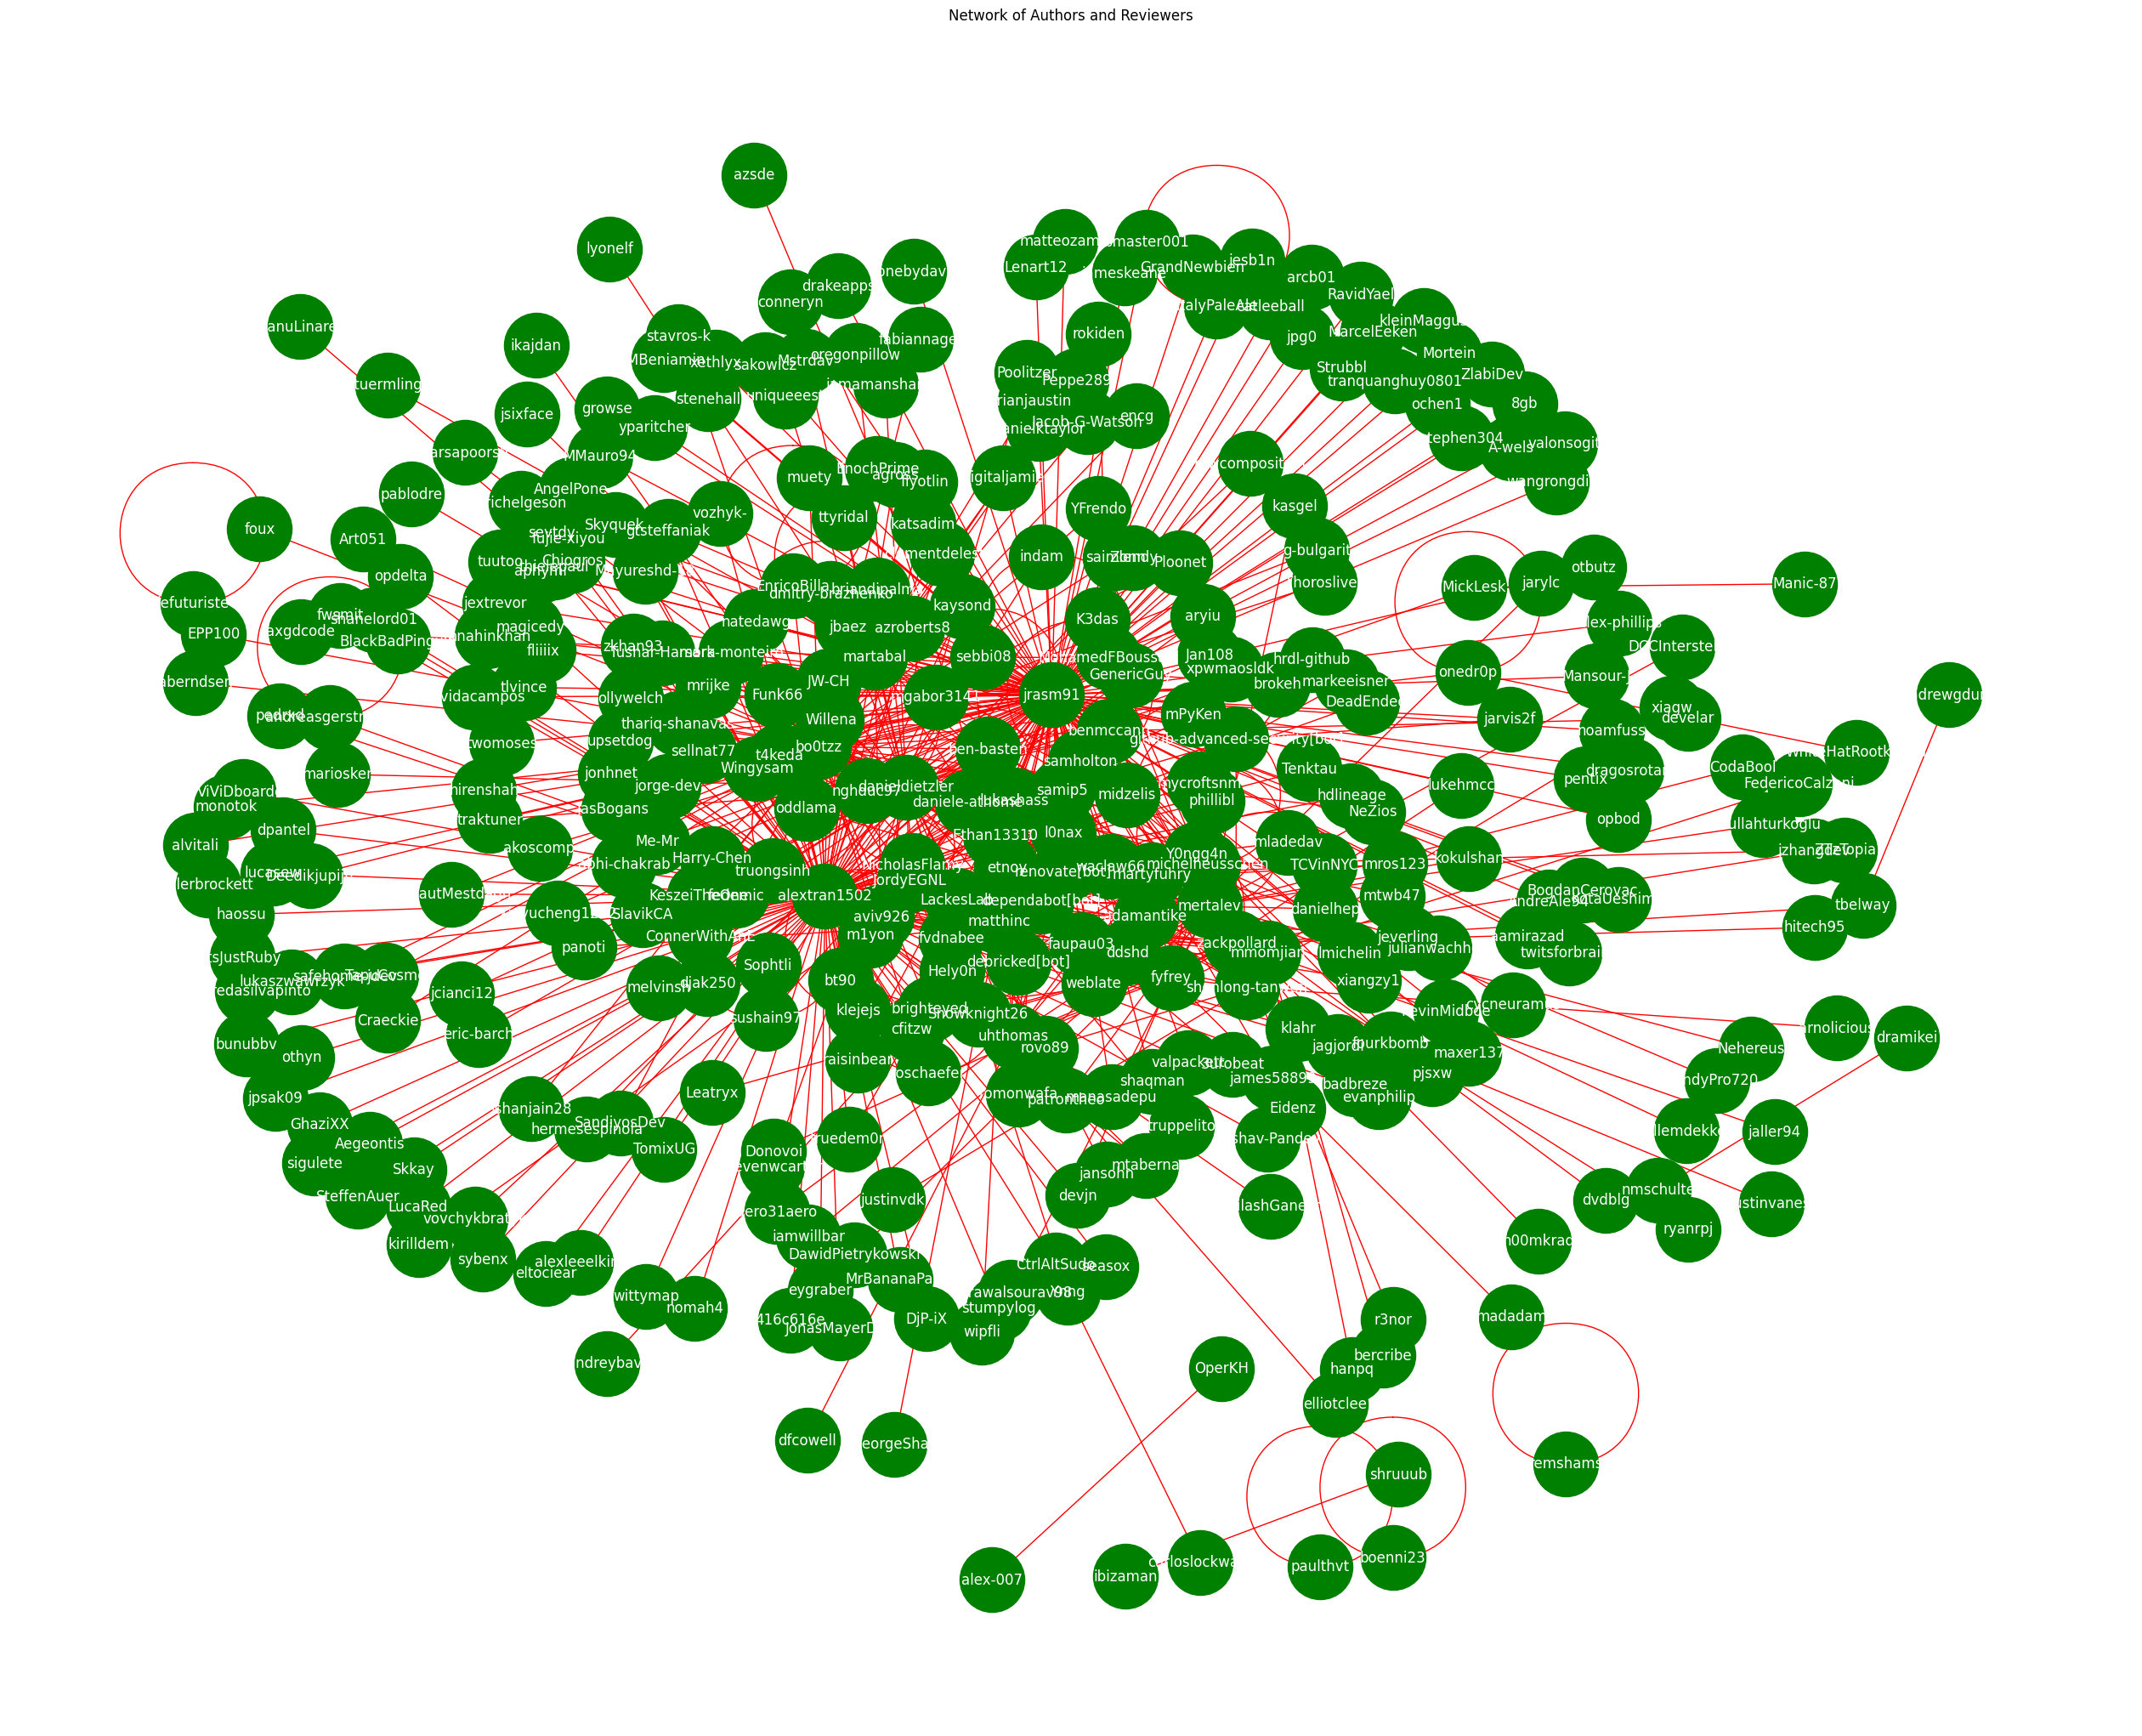

In [31]:
pos = nx.spring_layout(G, k=0.3) 
plt.figure(figsize=(25, 20))  
nx.draw(G, pos, with_labels=True, node_size=3000, font_size=12, font_color='white', node_color='green', edge_color='red')
plt.title('Network of Authors and Reviewers')
plt.show()